In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
from simulation_lib import *

def plot_b0_b1(mal, F1, F2, x0, x):
    plt.style.use('seaborn')
    plt.figure()
    plt.plot(mal, F1, marker='s', markersize=6, linewidth=4, label='D')
    plt.plot(mal, F2, marker='s', markersize=6, linewidth=4, linestyle='--', label='D\'')
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    plt.xlabel('resources allocated to attacker', fontsize=22)
    plt.ylabel('frequency', fontsize=22)
    plt.legend(loc='best', fontsize=22)
    plt.grid(True)
    plt.savefig('geo1.pdf', bbox_inches="tight")
    plt.show()

0.0
1.0
2.0
3.0
4.0
5.0
6.0
7.000000000000001
8.0
9.0
10.0
11.0
12.0
13.0
14.000000000000002
15.0
16.0
17.0
18.0
19.0
20.0
21.0
22.0
23.0
24.0
25.0
26.0
27.0
28.000000000000004
28.999999999999996
30.0
31.0
32.0
33.0
34.0
35.0
36.0
37.0
38.0
39.0
40.0
41.0
42.0
43.0
44.0
45.0
46.0
47.0
48.0
49.0
50.0
51.0
52.0
53.0
54.0
55.00000000000001
56.00000000000001
56.99999999999999
57.99999999999999
59.0
60.0
61.0
62.0
63.0
64.0
65.0
66.0
67.0
68.0
69.0
70.0
71.0
72.0
73.0
74.0
75.0
76.0
77.0
78.0
79.0
80.0
81.0
82.0
83.0
84.0
85.0
86.0
87.0
88.0
89.0
90.0
91.0
92.0
93.0
94.0
95.0
96.0
97.0
98.0
99.0
0.9


/var/folders/x9/z2pzxf912fdcy7630673mhg40000gn/T/ipykernel_6621/2065751857.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


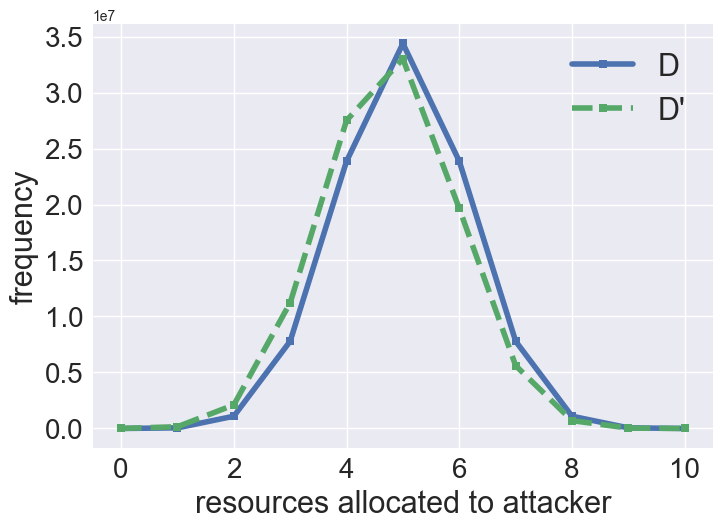

max index (y): 0
constant - Simulation (k = 10), after RA: 1.6767627268203549
constant - Simulation (k = 10), before RA (keep inf): inf
constant - Simulation (k = 10), after RA (keep inf): 1.6767627268203549
utility: 0.5000102679999986
[560, 54396, 1094939, 7793809, 23860523, 34379799, 23873040, 7793589, 1094515, 54303, 527] [2995, 155926, 2104684, 11226696, 27507343, 33006864, 19647465, 5614790, 701841, 31141, 255]
--- 458.57979011535645 seconds ---


In [4]:
# Parameter default setup
x = 20
x0 = 0
p = 0
c = 10
lamda = 0
s = 0

# special point test
noise_type = 'constant'
RD = 100000000  # rounds of simulation
k = 10
m = 10  # best strategy

P = [0.9]
result = []
utility = []

OFFSET = [10]

start_time = time.time()

for miu in OFFSET:
    for p in P:
        F = []
        F_prime = []
        a = []
        b = []
        uti = []
        for rd in range(RD):
            f, f_prime = add_noise(x0=x0, k=k, m=m, noise_type=noise_type, x=x, p=p, c=c, lamda=lamda, miu=miu, s=s)
            F.append(f)
            F_prime.append(f_prime)
            ra_f, ra_f_p, u = allocation(f=f, f_prime=f_prime, m=m, k=k)
            a.append(ra_f)
            b.append(ra_f_p)
            uti.append(u)
            if rd % 1000000 == 0:
                print("\r{0}".format((float(rd) / RD) * 100))

        utility.append(np.mean(uti))
        Before_RA_F, Before_RA_F_p = counter_process(F=F, F_prime=F_prime)
        After_RA_F, After_RA_F_p = counter_process(F=a, F_prime=b)
        print(p)
        plot_b0_b1(range(11), After_RA_F, After_RA_F_p, miu, p)
        r1 = non_inf(np.log(find_max(Before_RA_F, Before_RA_F_p)))
        # print('max index before RA (y):', r1.index(max(r1)) - abs(min(0, min(min(F), min(F_prime)))))
        # print(str(noise_type) + " - Simulation (k = " + str(k) + "), before RA:", max(r1))
        r2 = non_inf(np.log(find_max(After_RA_F, After_RA_F_p)))
        print('max index (y):', r2.index(max(r2)))
        print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA:", max(r2))

        print(str(noise_type) + " - Simulation (k = " + str(k) + "), before RA (keep inf):",
              max(np.log(find_max(Before_RA_F, Before_RA_F_p))))
        print(str(noise_type) + " - Simulation (k = " + str(k) + "), after RA (keep inf):",
              max(np.log(find_max(After_RA_F, After_RA_F_p))))
        result.append(max(r2))
        print("utility:", np.mean(uti))

print(After_RA_F, After_RA_F_p)
print("--- %s seconds ---" % (time.time() - start_time))
